In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,
    roc_curve, confusion_matrix
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Import classifiers
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [3]:
lgbm_features= ['CREDIT_TO_ANNUITY_RATIO',
 'EXT_SOURCES_MEAN',
 'DAYS_BIRTH',
 'DAYS_PAST_DUE_mean',
 'BURO_ACTIVE',
 'AMT_INSTALMENT_max',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'AMT_PAYMENT_sum',
 'EXT_SOURCE_1_TO_AGE_RATIO',
 'EXT_SOURCE_2',
 'CREDIT_SUM_OVERALL',
 'EXT_SOURCES_SUM',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_3_TO_AGE_RATIO',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'CODE_GENDER',
 'EXT_SOURCE_3',
 'CNT_DRAWINGS_ATM_CURRENT_mean',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2_TO_AGE_RATIO',
 'EMPLOYED_TO_AGE_RATIO',
 'DAYS_REGISTRATION',
 'DAYS_ENTRY_PAYMENT_max',
 'DAYS_INSTALMENT_min',
 'OVERDUE_DAYS_MAX',
 'NAME_EDUCATION_TYPE',
 'OWN_CAR_AGE',
 'AMT_PAYMENT_mean',
 'ANNUITY_TO_INCOME_RATIO',
 'DAYS_BEFORE_DUE_max',
 'AMT_INSTALMENT_min',
 'AMT_PAYMENT_max',
 'DAYS_BEFORE_DUE_sum',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_INSTALMENT_max',
 'AMT_PAYMENT_min',
 'DAYS_ENTRY_PAYMENT_min',
 'EXT_SOURCES_STD',
 'NAME_FAMILY_STATUS',
 'AMT_INSTALMENT_sum',
 'FLAG_OWN_CAR',
 'REGION_POPULATION_RELATIVE',
 'INCOME_PER_FAMILY_MEMBER',
 'OVERDUE_OVERALL',
 'CNT_DRAWINGS_CURRENT_mean',
 'OCCUPATION_TYPE',
 'NUM_LATE_PAYMENTS',
 'AMT_CREDIT_LIMIT_ACTUAL_mean',
 'TARGET']

In [4]:
# Defining the dataset directory
dataset_dir = "/Users/shrikantyalakki/Documents/PES/Sem-IV/Projects/Credit-Risk-Analysis/Data"

In [5]:
application_train = pd.read_csv(f"{dataset_dir}/application_train_final_Without_Null_value_for_Model.csv")

In [6]:
application_train = application_train[lgbm_features]

In [7]:
# Prepare data
X = application_train.drop(['TARGET'], axis=1)
y = application_train['TARGET']

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
# Initializing all models
models = {
    "lightgbm": LGBMClassifier(random_state=42, n_jobs=-1),
    "rf": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "ada": AdaBoostClassifier(random_state=42),
    "ridge": RidgeClassifier(random_state=42),
    "lr": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    "knn": KNeighborsClassifier(n_jobs=-1),
    "dt": DecisionTreeClassifier(random_state=42)
}

In [9]:
# Fit, predict and evaluate each model
results = {}
f1_values = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    # Use predict_proba if available, else decision_function or predict
    if hasattr(model, "predict_proba"):
        y_pred = model.predict_proba(X_valid)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred = model.decision_function(X_valid)
    else:
        y_pred = model.predict(X_valid)
    auc = roc_auc_score(y_valid, y_pred)
    f1_score_value = f1_score(y_valid, (y_pred > 0.5).astype(int))
    results[name] = auc
    f1_values[name] = f1_score_value
    print(f"{name.upper()} ROC AUC: {auc:.4f}")
    print(f"{name.upper()} F1 Score: {f1_score_value:.4f}")

print("\nModel ROC AUC Scores (Validation):")
for m, auc in results.items():
    print(f"{m.upper()}: {auc:.4f}")


print("\nModel F1 Scores (Validation):")
for m, f1 in f1_values.items():
    print(f"{m.upper()} F1 Score: {f1:.4f}")

Training lightgbm...
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10468
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
LIGHTGBM ROC AUC: 0.7759
LIGHTGBM F1 Score: 0.0574
Training rf...
RF ROC AUC: 0.7347
RF F1 Score: 0.0170
Training ada...
ADA ROC AUC: 0.7536
ADA F1 Score: 0.0108
Training ridge...
RIDGE ROC AUC: 0.7539
RIDGE F1 Score: 0.0000
Training lr...
LR ROC AUC: 0.6465
LR F1 Score: 0.0000
Training knn...
KNN ROC AUC: 0.5337
KNN F1 Score: 0.0222
Training dt...
DT ROC AUC: 0.5451
DT F1 Score: 0.1636

Model ROC AUC Scores (Validation):
LIGHTGBM: 0.7759
RF: 0.7347
ADA: 0.7536
RIDGE: 0.7539
LR

In [ ]:
# ------------------- Model definitions -------------------
model_dict = {
    'lightgbm': LGBMClassifier(random_state=42, n_jobs=-1),
    'rf': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'ada': AdaBoostClassifier(random_state=42),
    'logreg_l2': LogisticRegression(penalty='l2', random_state=42, max_iter=500, n_jobs=-1),
    'lr': LogisticRegression(max_iter=500, random_state=42, n_jobs=-1, solver='saga'),
    'knn': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=-1),
    #'svm': SVC(kernel='linear', probability=True, random_state=42, C=1.0, max_iter=500, class_weight='balanced'),
    'dt': DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=500, min_samples_split=50, min_samples_leaf=50),
}

In [11]:
# Impute missing, scale for all models (ridge, lr, knn, svm benefit from scaling)
preprocess = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_train_pp = preprocess.fit_transform(X_train)
X_valid_pp = preprocess.transform(X_valid)

In [12]:
# ------------------- Train & Evaluate All Models -------------------
results = []
roc_curves = {}

for model_name, model in model_dict.items():
    # Use scaled data for all to keep code consistent (tree models robust to unscaled, but OK here)
    model.fit(X_train_pp, y_train)
    print(f"Evaluating {model_name}...")
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_valid_pp)[:, 1]
    else:  # RidgeClassifier only has decision_function
        y_pred_proba = model.decision_function(X_valid_pp)
        # If Ridge output is not [0,1] probabilities, min-max scale to [0,1]
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
    auc = roc_auc_score(y_valid, y_pred_proba)
    f1 = f1_score(y_valid, (y_pred_proba > 0.5).astype(int))
    fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
    results.append({'Model': model_name, 'ROC_AUC': auc, 'F1_Score': f1})
    roc_curves[model_name] = (fpr, tpr, auc)



[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10473
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Evaluating lightgbm...
Evaluating rf...
Evaluating ada...
Evaluating logreg_l2...
Evaluating lr...
Evaluating knn...
Evaluating svm...
Evaluating dt...


In [13]:
# Store results in DataFrame
results_df = pd.DataFrame(results).sort_values('ROC_AUC', ascending=False).reset_index(drop=True)
print(results_df)


       Model   ROC_AUC  F1_Score
0   lightgbm  0.775692  0.058531
1  logreg_l2  0.756380  0.027772
2         lr  0.756368  0.027006
3        ada  0.753556  0.010776
4         rf  0.734866  0.017047
5         dt  0.670068  0.071468
6        svm  0.651578  0.000000
7        knn  0.614963  0.082780


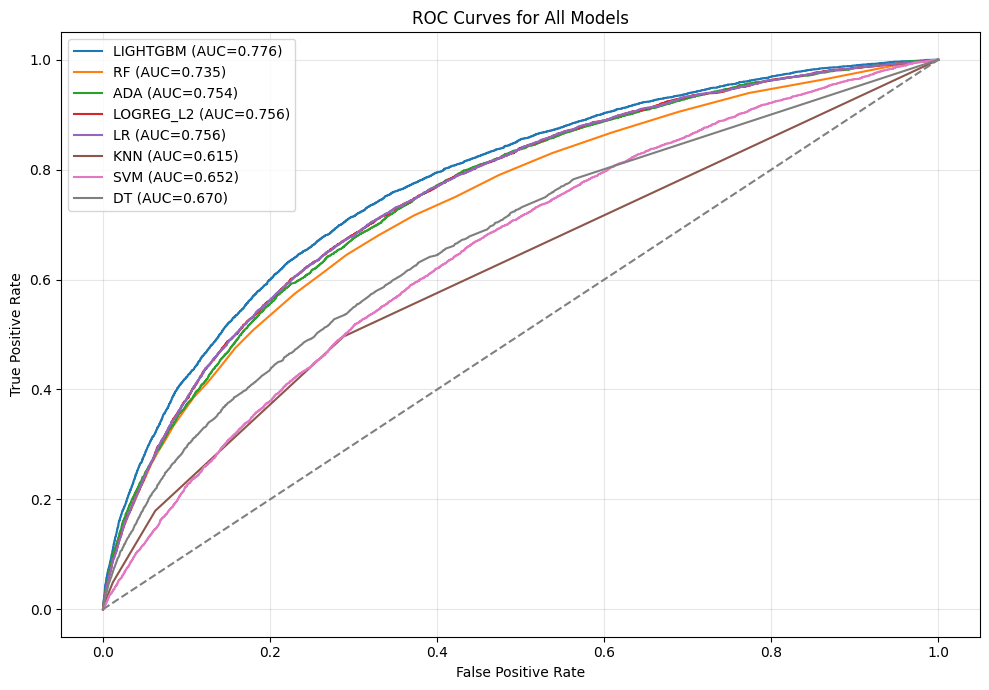

In [14]:
# ------------------- Plot ROC Curves -------------------
plt.figure(figsize=(10,7))
for model_name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name.upper()} (AUC={auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## hyper parameter tuning

In [15]:
# -------------------
# Define parameter grids
# -------------------
param_grids = {
    'lr': {
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'fit_intercept': [True, False]
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'sag', 'lbfgs']
    },
    'sgd': {
        'loss': ['hinge', 'log_loss'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [1e-4, 1e-3, 1e-2],
        'max_iter': [1000, 2000],
        'learning_rate': ['optimal', 'adaptive'],
        'eta0': [0.001, 0.01]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': [None, 'balanced'],
        'probability': [True]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'dt': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [4, 6, 8, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    'rf': {
        'n_estimators': [100, 300, 500],
        'max_depth': [6, 10, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'max_features': ['sqrt', 'log2']
    },
    'ada': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'lightgbm': {
        'num_leaves': [15, 31, 63],
        'max_depth': [-1, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 300, 500],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0]
    },
    'logreg_l2': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths (inverse)
        'tol': [1e-4, 1e-3, 1e-2],            # Tolerance for stopping criteria
        'fit_intercept': [True, False]        # Whether to fit the intercept
    }
}



In [ ]:
# -------------------
# Define base models
# -------------------
base_models = {
    'lightgbm': LGBMClassifier(random_state=42, n_jobs=-1),
    'rf': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'ada': AdaBoostClassifier(random_state=42),
    'logreg_l2': LogisticRegression(penalty='l2', random_state=42, max_iter=500, n_jobs=-1),
    'lr': LogisticRegression(max_iter=500, random_state=42, n_jobs=-1, solver='saga'),
    'knn': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=-1),
    # 'svm': SVC(kernel='linear', probability=True, random_state=42, C=1.0, max_iter=500, class_weight='balanced'),
    'dt': DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=500, min_samples_split=50, min_samples_leaf=50),
}

In [19]:
# -------------------
# Run tuning
# -------------------
best_params_dict = {}
auc_scores = {}
f1_scores = {}

for name, model in base_models.items():
    print(f"🔍 Tuning {name}...")
    
    # Use smaller search for heavy models
    if name in ['rf', 'lightgbm']:
        search = RandomizedSearchCV(
            model, param_distributions=param_grids[name], 
            n_iter=20, scoring='roc_auc', cv=3, n_jobs=-1, verbose=0,
            random_state=123
        )
    else:
        search = GridSearchCV(
            model, param_grid=param_grids[name], 
            scoring='roc_auc', cv=3, n_jobs=-1, verbose=0
        )
    
    search.fit(X_train, y_train)
    best_params_dict[name] = search.best_params_
    
    # Evaluate on validation
    if hasattr(search.best_estimator_, "predict_proba"):
        y_pred = search.best_estimator_.predict_proba(X_valid)[:, 1]
    else:
        y_pred = search.best_estimator_.decision_function(X_valid)
        # Scale to 0-1
        y_pred = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())
    
    auc = roc_auc_score(y_valid, y_pred)
    auc_scores[name] = auc
    f1 = f1_score(y_valid, (y_pred > 0.5).astype(int))
    f1_scores[name] = f1
    print(f"Best params for {name}: {search.best_params_}")
    print(f"Validation AUC for {name}: {auc:.4f}\n")
    print(f"Validation F1 Score for {name}: {f1:.4f}\n")


🔍 Tuning lightgbm...


[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150766
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10452
[LightGBM] [Info] A

In [21]:
# -------------------
# Store results
# -------------------
results_df = pd.DataFrame({
    'Model': list(auc_scores.keys()),
    'Best_Params': [best_params_dict[m] for m in auc_scores.keys()],
    'Val_ROC_AUC': list(auc_scores.values()),
    'Val_F1_Score': list(f1_scores.values())
}).sort_values('Val_ROC_AUC', ascending=False)
results_df

,Model,Best_Params,Val_ROC_AUC,Val_F1_Score
0,lightgbm,"{'subsample': 0.9, 'num_leaves': 15, 'n_estima...",0.778385,0.056607
2,ada,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.760494,0.017878
1,rf,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.756426,0.009990
7,dt,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.727210,0.024400
3,logreg_l2,"{'C': 1, 'fit_intercept': False, 'tol': 0.0001}",0.636966,0.000000
4,lr,"{'C': 1.0, 'fit_intercept': False, 'penalty': ...",0.636966,0.000000
5,knn,"{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}",0.551499,0.007511
6,svm,"{'C': 0.1, 'class_weight': None, 'kernel': 'li...",0.434589,0.000000


In [25]:
# ---- Model name to class mapping ----
model_base = {
    'lr': LogisticRegression,
    'ridge': RidgeClassifier,
    'knn': KNeighborsClassifier,
    'dt': DecisionTreeClassifier,
    'rf': RandomForestClassifier,
    'logreg_l2': LogisticRegression,
    'ada': AdaBoostClassifier,
    'lightgbm': LGBMClassifier 
}

In [26]:
# Define a model factory to create model instances by name with best parameters
def create_model_instance(name, params):
    # Remove random_state from params if present to avoid duplicates
    params = params.copy()  # avoid mutating original dict
    params.pop('random_state', None)
    
    if name in ['lr', 'logreg_l2']:
        return LogisticRegression(random_state=123, max_iter=1000, n_jobs=-1, **params)
    elif name == 'lightgbm':
        return LGBMClassifier(random_state=123, n_jobs=-1, **params)
    elif name == 'ada':
        # Pass explicit random_state, exclude from params
        return AdaBoostClassifier(random_state=123, **params)
    elif name == 'rf':
        return RandomForestClassifier(random_state=123, n_jobs=-1, **params)
    elif name == 'dt':
        return DecisionTreeClassifier(random_state=123, **params)
    elif name == 'knn':
        return KNeighborsClassifier(**params)
    else:
        raise ValueError(f"Model name {name} not recognized or supported.")

In [27]:
# Models that require scaling (linear models, distance-based)
models_need_scaling = ['lr', 'logreg_l2', 'knn']


Building model: lightgbm with best params: {'subsample': 0.9, 'num_leaves': 15, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10465
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


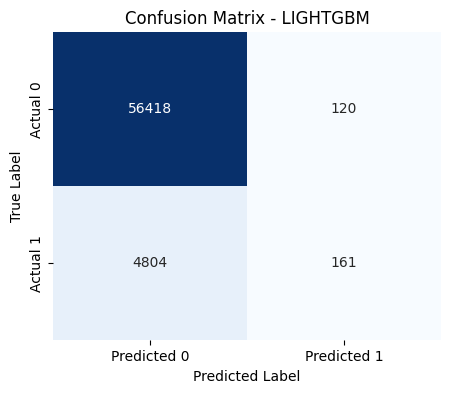


Building model: ada with best params: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}


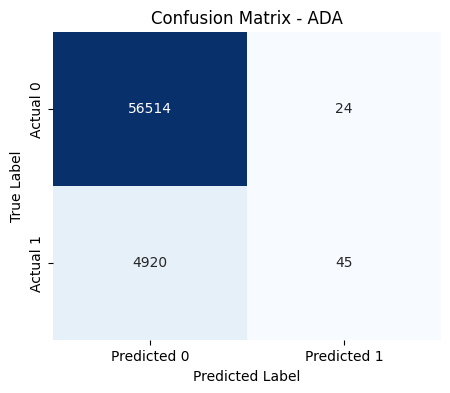


Building model: rf with best params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': None}


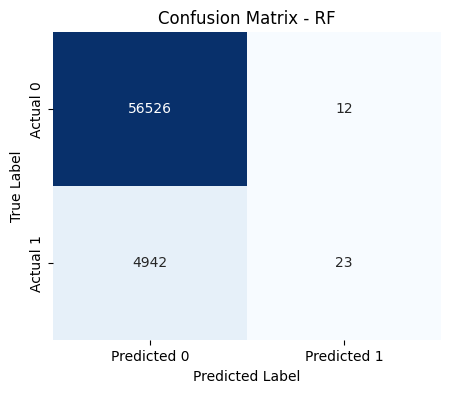


Building model: dt with best params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


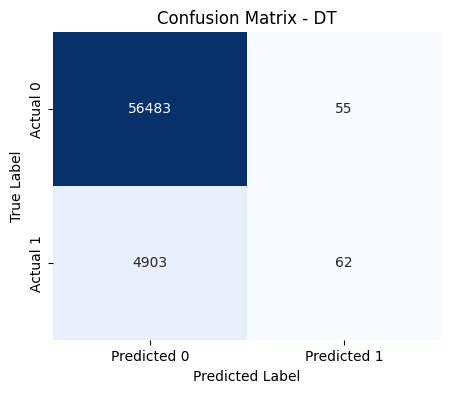


Building model: logreg_l2 with best params: {'C': 1, 'fit_intercept': False, 'tol': 0.0001}


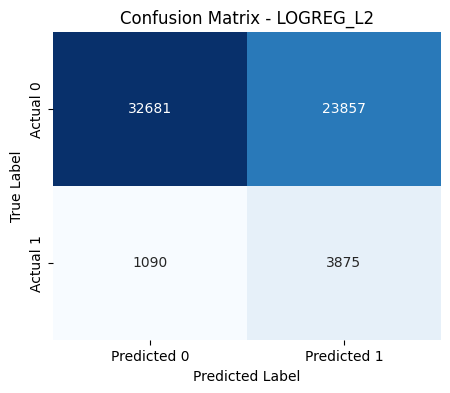


Building model: lr with best params: {'C': np.float64(1.0), 'fit_intercept': False, 'penalty': 'l2', 'solver': 'lbfgs'}


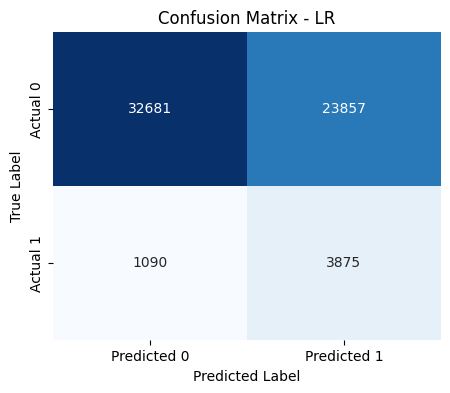


Building model: knn with best params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


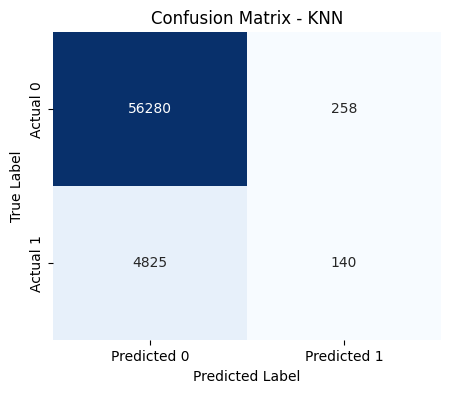

Model svm not recognized, skipping...


In [28]:
# Prepare metric storage and ROC data
metrics_list = []
roc_curves = {}

# Define imputers and scalers
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

for idx, row in results_df.iterrows():
    model_name = row['Model']
    best_params = row['Best_Params']
    if model_name not in model_base:
        print(f"Model {model_name} not recognized, skipping...")
        continue
    print(f"\nBuilding model: {model_name} with best params: {best_params}")
    
    model = create_model_instance(model_name, best_params)
    
    # Preprocess data according to model requirement
    if model_name in models_need_scaling:
        X_train_pp = imputer.fit_transform(X_train)
        X_train_pp = scaler.fit_transform(X_train_pp)
        X_valid_pp = imputer.transform(X_valid)
        X_valid_pp = scaler.transform(X_valid_pp)
    else:
        X_train_pp = imputer.fit_transform(X_train)
        X_valid_pp = imputer.transform(X_valid)
    
    # Fit model
    model.fit(X_train_pp, y_train)
    
    # Predict probabilities or decision function, ensuring probabilities for auc
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_valid_pp)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_valid_pp)
        # Scale to [0,1]
        y_pred_proba = (y_pred_proba - np.min(y_pred_proba)) / (np.max(y_pred_proba) - np.min(y_pred_proba))
    
    # Predict class labels using 0.5 threshold
    y_pred = (y_pred_proba >= 0.5).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_valid, y_pred, zero_division=0)
    recall = recall_score(y_valid, y_pred, zero_division=0)
    f1 = f1_score(y_valid, y_pred, zero_division=0)
    accuracy = accuracy_score(y_valid, y_pred)
    auc = roc_auc_score(y_valid, y_pred_proba)
    
    metrics_list.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'Accuracy': accuracy,
        'ROC_AUC': auc
    })
    
    fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
    roc_curves[model_name] = (fpr, tpr, auc)
    
    # Plot confusion matrix as heatmap
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name.upper()}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [29]:
metrics_df = pd.DataFrame(metrics_list).sort_values('ROC_AUC', ascending=False).reset_index(drop=True)
print("\nModel comparison on validation ")
metrics_df


Model comparison on validation 


,Model,Precision,Recall,F1_Score,Accuracy,ROC_AUC
0,lightgbm,0.572954,0.032427,0.061380,0.919939,0.778921
1,ada,0.652174,0.009063,0.017878,0.919614,0.760494
2,rf,0.657143,0.004632,0.009200,0.919451,0.757857
3,logreg_l2,0.139730,0.780463,0.237025,0.594378,0.753656
4,lr,0.139730,0.780463,0.237025,0.594378,0.753656
5,dt,0.529915,0.012487,0.024400,0.919386,0.727210
6,knn,0.351759,0.028197,0.052210,0.917354,0.658716


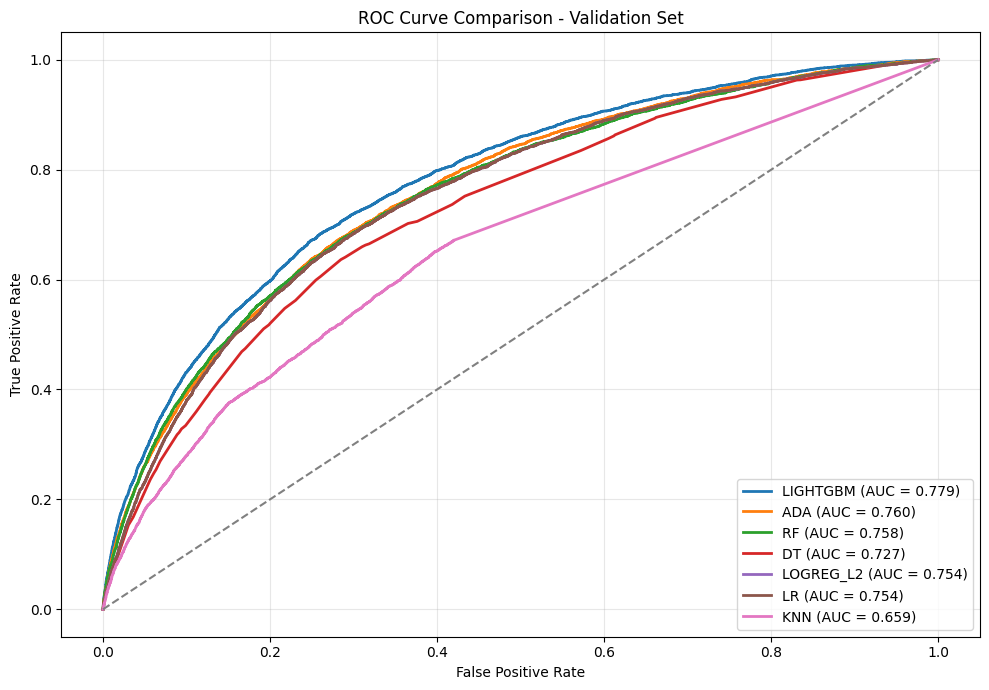

In [30]:
# Plot ROC curves for all models together
plt.figure(figsize=(10, 7))
for model_name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f"{model_name.upper()} (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Validation Set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Introducing synthetic data using SMOTE as we have imbalance data

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [33]:
print("Original class distribution in training set:")
print(y_train.value_counts())
print("Resampled class distribution in training set:")
y_train_sm.value_counts()

Original class distribution in training set:
TARGET
0    226148
1     19860
Name: count, dtype: int64
Resampled class distribution in training set:


TARGET
0    226148
1    226148
Name: count, dtype: int64

In [34]:
# Initializing all models
models = {
    "lightgbm": LGBMClassifier(random_state=42, n_jobs=-1),
    "rf": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "ada": AdaBoostClassifier(random_state=42),
    "ridge": RidgeClassifier(random_state=42),
    "lr": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    "knn": KNeighborsClassifier(n_jobs=-1),
    "dt": DecisionTreeClassifier(random_state=42)
}

In [35]:
# Fit, predict and evaluate each model
results = {}
f1_values = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_sm, y_train_sm)
    # Use predict_proba if available, else decision_function or predict
    if hasattr(model, "predict_proba"):
        y_pred = model.predict_proba(X_valid)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred = model.decision_function(X_valid)
    else:
        y_pred = model.predict(X_valid)
    auc = roc_auc_score(y_valid, y_pred)
    f1_score_value = f1_score(y_valid, (y_pred > 0.5).astype(int))
    results[name] = auc
    f1_values[name] = f1_score_value
    print(f"{name.upper()} ROC AUC: {auc:.4f}")
    print(f"{name.upper()} F1 Score: {f1_score_value:.4f}")

print("\nModel ROC AUC Scores (Validation):")
for m, auc in results.items():
    print(f"{m.upper()}: {auc:.4f}")


print("\nModel F1 Scores (Validation):")
for m, f1 in f1_values.items():
    print(f"{m.upper()} F1 Score: {f1:.4f}")

Training lightgbm...
[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11510
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LIGHTGBM ROC AUC: 0.7481
LIGHTGBM F1 Score: 0.0949
Training rf...
RF ROC AUC: 0.7272
RF F1 Score: 0.1670
Training ada...
ADA ROC AUC: 0.6977
ADA F1 Score: 0.2371
Training ridge...
RIDGE ROC AUC: 0.7093
RIDGE F1 Score: 0.2265
Training lr...
LR ROC AUC: 0.6270
LR F1 Score: 0.1947
Training knn...
KNN ROC AUC: 0.5376
KNN F1 Score: 0.1495
Training dt...
DT ROC AUC: 0.5464
DT F1 Score: 0.1650

Model ROC AUC Scores (Validation):
LIGHTGBM: 0.7481
RF: 0.7272
ADA: 0.6977
RIDGE:

In [37]:
# ------------------- Model definitions -------------------
model_dict = {
    'lightgbm': LGBMClassifier(random_state=42, n_jobs=-1),
    'rf': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'ada': AdaBoostClassifier(random_state=42),
    'logreg_l2': LogisticRegression(penalty='l2', random_state=42, max_iter=500, n_jobs=-1),
    'lr': LogisticRegression(max_iter=500, random_state=42, n_jobs=-1, solver='saga'),
    'knn': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=-1),
    'dt': DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=500, min_samples_split=50, min_samples_leaf=50),
}

In [39]:
# Impute missing, scale for all models (ridge, lr, knn, svm benefit from scaling)
preprocess = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_train_pp = preprocess.fit_transform(X_train_sm)
X_valid_pp = preprocess.transform(X_valid)

In [41]:
# ------------------- Train & Evaluate All Models -------------------
results = []
roc_curves = {}

for model_name, model in model_dict.items():
    # Use scaled data for all to keep code consistent (tree models robust to unscaled, but OK here)
    model.fit(X_train_pp, y_train_sm)
    print(f"Evaluating {model_name}...")
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_valid_pp)[:, 1]
    else:  # RidgeClassifier only has decision_function
        y_pred_proba = model.decision_function(X_valid_pp)
        # If Ridge output is not [0,1] probabilities, min-max scale to [0,1]
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
    auc = roc_auc_score(y_valid, y_pred_proba)
    f1 = f1_score(y_valid, (y_pred_proba > 0.5).astype(int))
    fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
    results.append({'Model': model_name, 'ROC_AUC': auc, 'F1_Score': f1})
    roc_curves[model_name] = (fpr, tpr, auc)



[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11515
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Evaluating lightgbm...
Evaluating rf...
Evaluating ada...
Evaluating logreg_l2...
Evaluating lr...
Evaluating knn...
Evaluating dt...


In [42]:
# Store results in DataFrame
results_df = pd.DataFrame(results).sort_values('ROC_AUC', ascending=False).reset_index(drop=True)
results_df


,Model,ROC_AUC,F1_Score
0,lightgbm,0.746374,0.095502
1,rf,0.727282,0.164484
2,logreg_l2,0.708473,0.249668
3,lr,0.708445,0.249889
4,ada,0.697660,0.237117
5,knn,0.650963,0.209194
6,dt,0.650521,0.161133


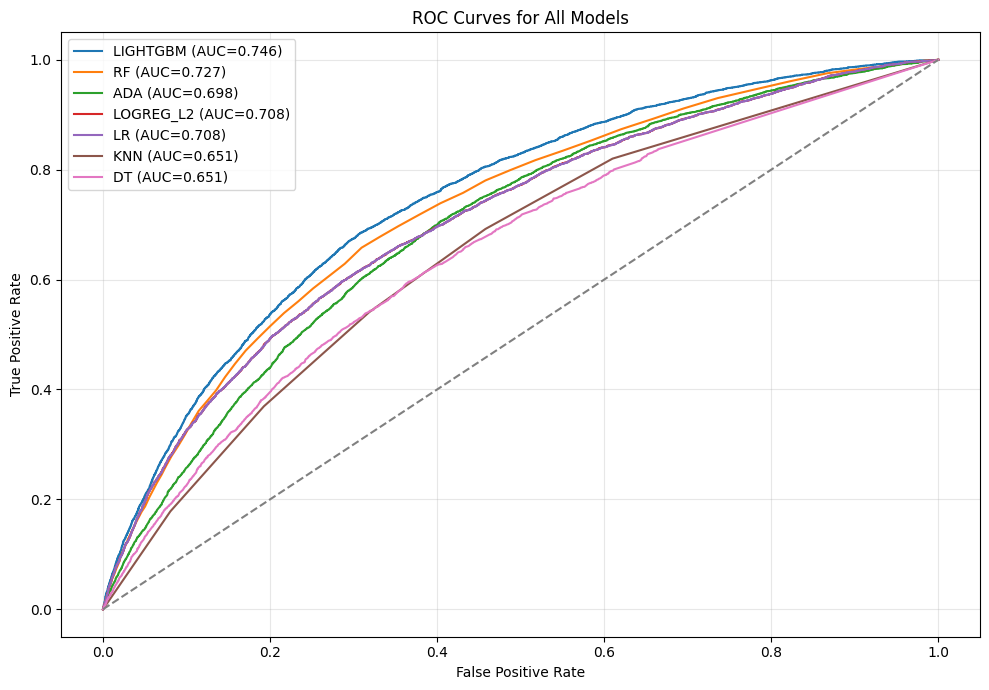

In [43]:
# ------------------- Plot ROC Curves -------------------
plt.figure(figsize=(10,7))
for model_name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name.upper()} (AUC={auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
# -------------------
# Define parameter grids
# -------------------
param_grids = {
    'lr': {
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'fit_intercept': [True, False]
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'sag', 'lbfgs']
    },
    'sgd': {
        'loss': ['hinge', 'log_loss'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [1e-4, 1e-3, 1e-2],
        'max_iter': [1000, 2000],
        'learning_rate': ['optimal', 'adaptive'],
        'eta0': [0.001, 0.01]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': [None, 'balanced'],
        'probability': [True]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'dt': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [4, 6, 8, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    'rf': {
        'n_estimators': [100, 300, 500],
        'max_depth': [6, 10, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'max_features': ['sqrt', 'log2']
    },
    'ada': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'lightgbm': {
        'num_leaves': [15, 31, 63],
        'max_depth': [-1, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 300, 500],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0]
    },
    'logreg_l2': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths (inverse)
        'tol': [1e-4, 1e-3, 1e-2],            # Tolerance for stopping criteria
        'fit_intercept': [True, False]        # Whether to fit the intercept
    }
}



In [45]:
# -------------------
# Define base models
# -------------------
base_models = {
    'lightgbm': LGBMClassifier(random_state=42, n_jobs=-1),
    'rf': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'ada': AdaBoostClassifier(random_state=42),
    'logreg_l2': LogisticRegression(penalty='l2', random_state=42, max_iter=500, n_jobs=-1),
    'lr': LogisticRegression(max_iter=500, random_state=42, n_jobs=-1, solver='saga'),
    'knn': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=-1),
    'dt': DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=500, min_samples_split=50, min_samples_leaf=50),
}

In [46]:
# -------------------
# Run tuning
# -------------------
best_params_dict = {}
auc_scores = {}
f1_scores = {}

for name, model in base_models.items():
    print(f"Tuning {name}...")
    
    # Use smaller search for heavy models
    if name in ['rf', 'lightgbm']:
        search = RandomizedSearchCV(
            model, param_distributions=param_grids[name], 
            n_iter=20, scoring='roc_auc', cv=3, n_jobs=-1, verbose=0,
            random_state=123
        )
    else:
        search = GridSearchCV(
            model, param_grid=param_grids[name], 
            scoring='roc_auc', cv=3, n_jobs=-1, verbose=0
        )
    
    search.fit(X_train_sm, y_train_sm)
    best_params_dict[name] = search.best_params_
    
    # Evaluate on validation
    if hasattr(search.best_estimator_, "predict_proba"):
        y_pred = search.best_estimator_.predict_proba(X_valid)[:, 1]
    else:
        y_pred = search.best_estimator_.decision_function(X_valid)
        # Scale to 0-1
        y_pred = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())
    
    auc = roc_auc_score(y_valid, y_pred)
    auc_scores[name] = auc
    f1 = f1_score(y_valid, (y_pred > 0.5).astype(int))
    f1_scores[name] = f1
    print(f"Best params for {name}: {search.best_params_}")
    print(f"Validation AUC for {name}: {auc:.4f}\n")
    print(f"Validation F1 Score for {name}: {f1:.4f}\n")


Tuning lightgbm...
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11510
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11510
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 50
[LightGBM] [Info] Start training from score 0.000007
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1507

In [47]:
# -------------------
# Store results
# -------------------
results_df = pd.DataFrame({
    'Model': list(auc_scores.keys()),
    'Best_Params': [best_params_dict[m] for m in auc_scores.keys()],
    'Val_ROC_AUC': list(auc_scores.values()),
    'Val_F1_Score': list(f1_scores.values())
}).sort_values('Val_ROC_AUC', ascending=False)
results_df

,Model,Best_Params,Val_ROC_AUC,Val_F1_Score
0,lightgbm,"{'subsample': 1.0, 'num_leaves': 63, 'n_estima...",0.736502,0.136399
1,rf,"{'n_estimators': 300, 'min_samples_split': 10,...",0.735688,0.182575
2,ada,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.712949,0.225751
3,logreg_l2,"{'C': 0.01, 'fit_intercept': False, 'tol': 0.0...",0.623198,0.193237
4,lr,"{'C': 0.01, 'fit_intercept': False, 'penalty':...",0.623198,0.193237
6,dt,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.587092,0.165153
5,knn,"{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}",0.550389,0.155554


In [48]:
# ---- Model name to class mapping ----
model_base = {
    'lr': LogisticRegression,
    'ridge': RidgeClassifier,
    'knn': KNeighborsClassifier,
    'dt': DecisionTreeClassifier,
    'rf': RandomForestClassifier,
    'logreg_l2': LogisticRegression,
    'ada': AdaBoostClassifier,
    'lightgbm': LGBMClassifier 
}

In [49]:
# Define a model factory to create model instances by name with best parameters
def create_model_instance(name, params):
    # Remove random_state from params if present to avoid duplicates
    params = params.copy()  # avoid mutating original dict
    params.pop('random_state', None)
    
    if name in ['lr', 'logreg_l2']:
        return LogisticRegression(random_state=123, max_iter=1000, n_jobs=-1, **params)
    elif name == 'lightgbm':
        return LGBMClassifier(random_state=123, n_jobs=-1, **params)
    elif name == 'ada':
        # Pass explicit random_state, exclude from params
        return AdaBoostClassifier(random_state=123, **params)
    elif name == 'rf':
        return RandomForestClassifier(random_state=123, n_jobs=-1, **params)
    elif name == 'dt':
        return DecisionTreeClassifier(random_state=123, **params)
    elif name == 'knn':
        return KNeighborsClassifier(**params)
    else:
        raise ValueError(f"Model name {name} not recognized or supported.")


Building model: lightgbm with best params: {'subsample': 1.0, 'num_leaves': 63, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10465
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

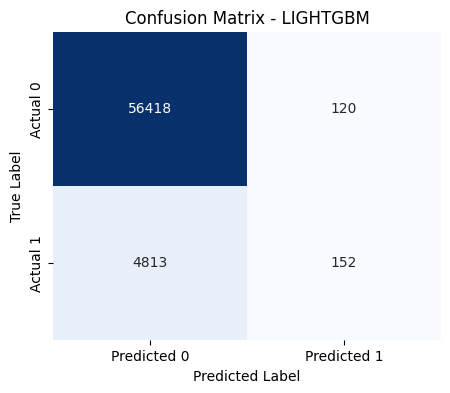


Building model: rf with best params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


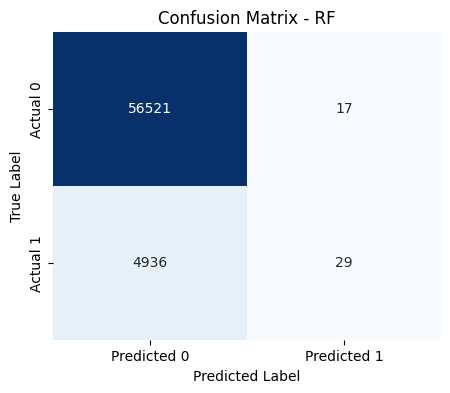


Building model: ada with best params: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}


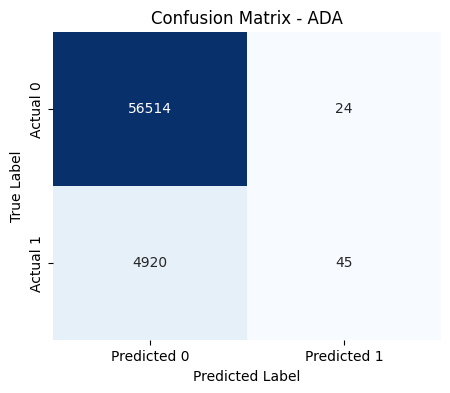


Building model: logreg_l2 with best params: {'C': 0.01, 'fit_intercept': False, 'tol': 0.0001}


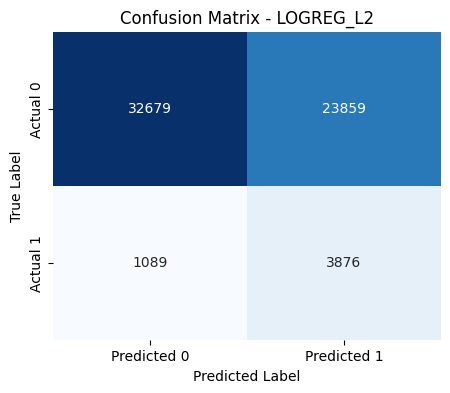


Building model: lr with best params: {'C': np.float64(0.01), 'fit_intercept': False, 'penalty': 'l2', 'solver': 'lbfgs'}


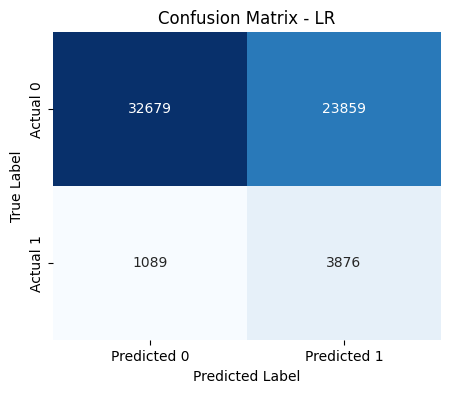


Building model: dt with best params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


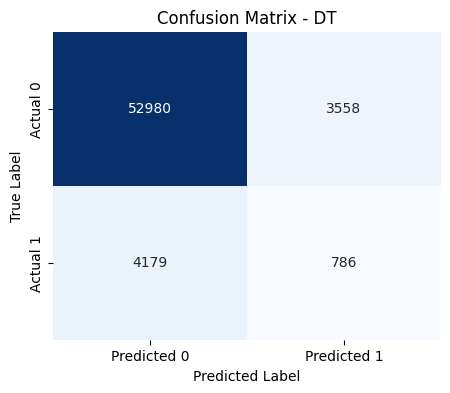


Building model: knn with best params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


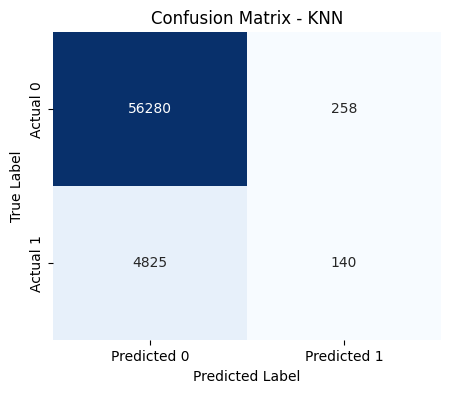

In [50]:
# Prepare metric storage and ROC data
metrics_list = []
roc_curves = {}

# Define imputers and scalers
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

for idx, row in results_df.iterrows():
    model_name = row['Model']
    best_params = row['Best_Params']
    if model_name not in model_base:
        print(f"Model {model_name} not recognized, skipping...")
        continue
    print(f"\nBuilding model: {model_name} with best params: {best_params}")
    
    model = create_model_instance(model_name, best_params)
    
    # Preprocess data according to model requirement
    if model_name in models_need_scaling:
        X_train_pp = imputer.fit_transform(X_train)
        X_train_pp = scaler.fit_transform(X_train_pp)
        X_valid_pp = imputer.transform(X_valid)
        X_valid_pp = scaler.transform(X_valid_pp)
    else:
        X_train_pp = imputer.fit_transform(X_train)
        X_valid_pp = imputer.transform(X_valid)
    
    # Fit model
    model.fit(X_train_pp, y_train)
    
    # Predict probabilities or decision function, ensuring probabilities for auc
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_valid_pp)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_valid_pp)
        # Scale to [0,1]
        y_pred_proba = (y_pred_proba - np.min(y_pred_proba)) / (np.max(y_pred_proba) - np.min(y_pred_proba))
    
    # Predict class labels using 0.5 threshold
    y_pred = (y_pred_proba >= 0.5).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_valid, y_pred, zero_division=0)
    recall = recall_score(y_valid, y_pred, zero_division=0)
    f1 = f1_score(y_valid, y_pred, zero_division=0)
    accuracy = accuracy_score(y_valid, y_pred)
    auc = roc_auc_score(y_valid, y_pred_proba)
    
    metrics_list.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'Accuracy': accuracy,
        'ROC_AUC': auc
    })
    
    fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
    roc_curves[model_name] = (fpr, tpr, auc)
    
    # Plot confusion matrix as heatmap
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name.upper()}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [51]:
metrics_df = pd.DataFrame(metrics_list).sort_values('ROC_AUC', ascending=False).reset_index(drop=True)
print("\nModel comparison on validation ")
metrics_df


Model comparison on validation 


,Model,Precision,Recall,F1_Score,Accuracy,ROC_AUC
0,lightgbm,0.558824,0.030614,0.058049,0.919793,0.775496
1,ada,0.652174,0.009063,0.017878,0.919614,0.760494
2,logreg_l2,0.139751,0.780665,0.237064,0.594361,0.753763
3,lr,0.139751,0.780665,0.237064,0.594361,0.753763
4,rf,0.630435,0.005841,0.011575,0.919467,0.747361
5,knn,0.351759,0.028197,0.052210,0.917354,0.658716
6,dt,0.180939,0.158308,0.168869,0.874201,0.595710


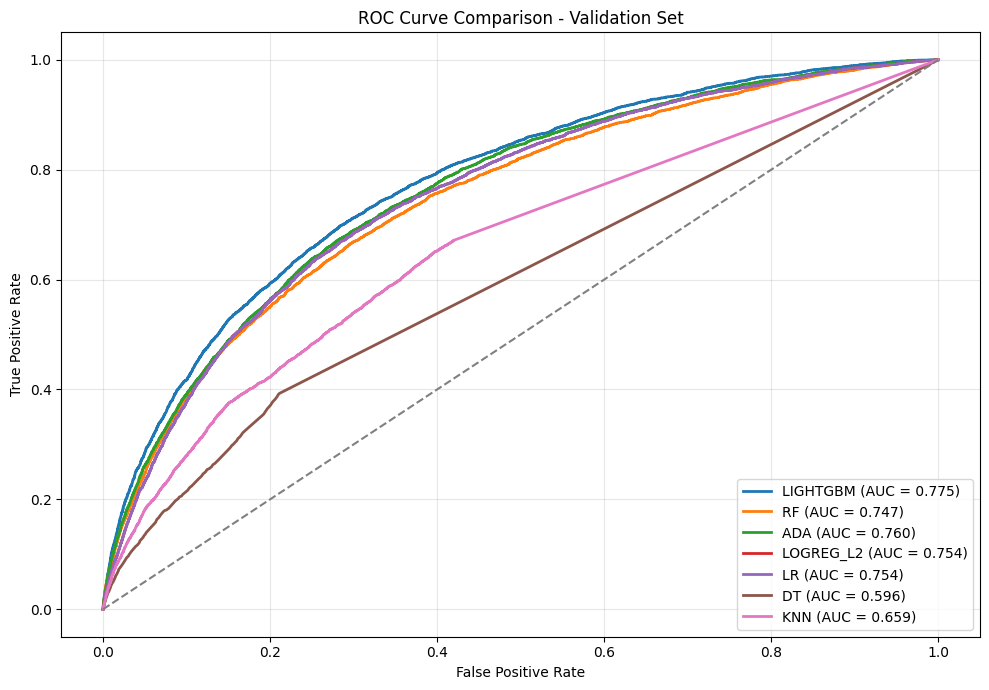

In [52]:
# Plot ROC curves for all models together
plt.figure(figsize=(10, 7))
for model_name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f"{model_name.upper()} (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Validation Set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()